## Ejercicio 3
### Regresión Lineal

Trabajaremos con un conjunto de datos del censo de EE. UU. ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes de altos ingresos podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona en función de otra información.

Nuestro objetivo es crear un modelo predictivo que pueda generar una estimación del ingreso de una persona.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/vanejaime/Curso_Python_CD/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Punto 3.1 

¿Cuál es la relación entre la edad y los ingresos?

Para un aumento del uno por ciento en la Edad, ¿cuánto aumenta el ingreso?

Usando sklearn estimar una regresión lineal y predecir solo con la variable edad. Cual es el ingreso cuando la edad esta entre los 30 y 40 años (Grafique)

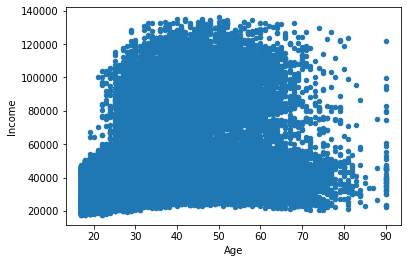

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

[32484.32671636]
[[541.93134441]]


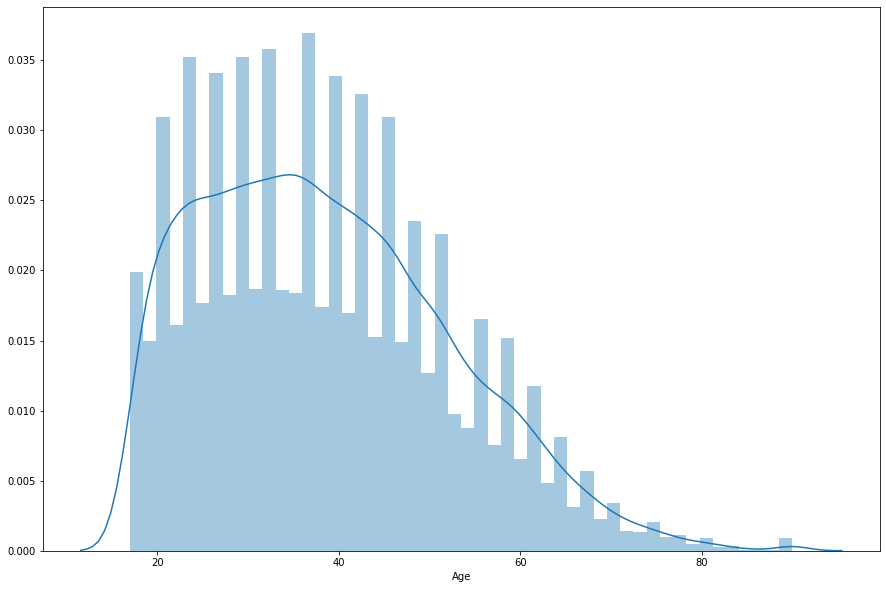

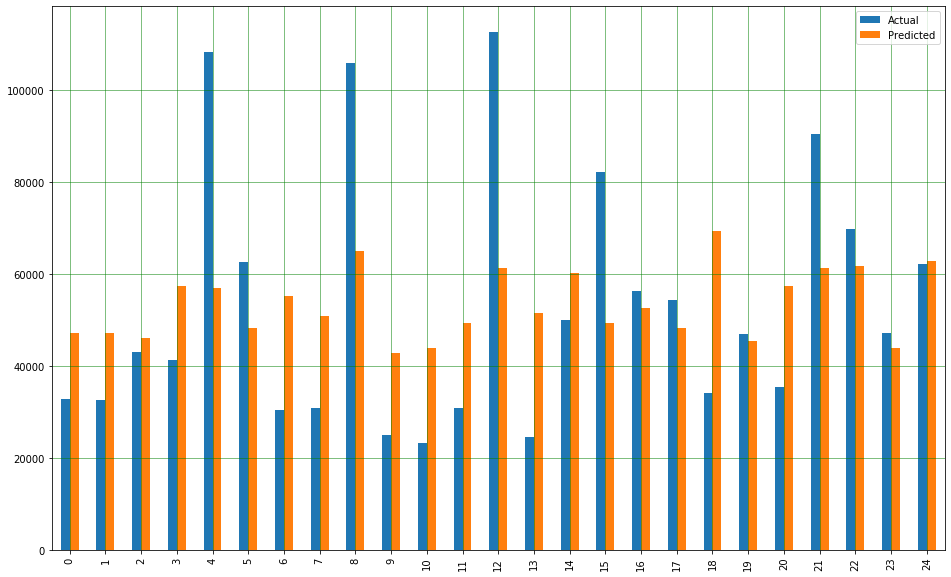

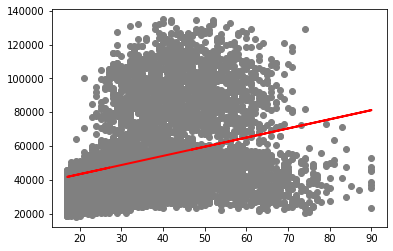

In [18]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(income['Age'])

X = income['Age'].values.reshape(-1,1)
y = income['Income'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Punto 3.2
Evalue el modelo usando las metricas vistas (MAE,MSE,RMSE)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19005.8929627623
Mean Squared Error: 598968970.0302852
Root Mean Squared Error: 24473.842567735155


# Punto 3.3


Estime una regresion usando mas variables. Inprima los coeficientes hallados.


-19620.580846190525
[4.63912914e+02 5.25325436e-03 3.62034779e+03 4.77023753e-01
 5.94281222e+00 4.11477184e+02]


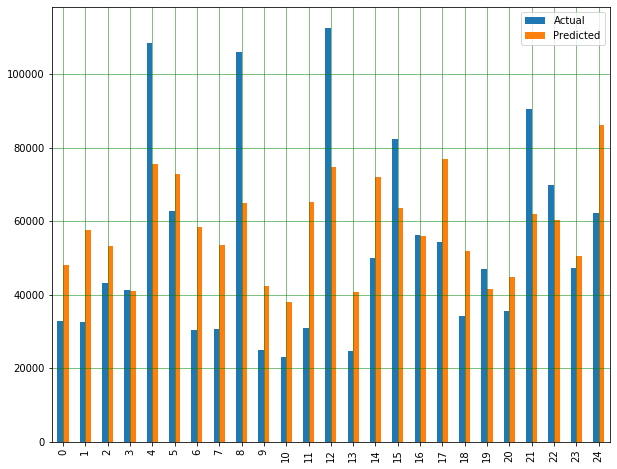

In [35]:
#X = income[['Age','Workclass','fnlwgt','Education','Education-Num','Martial Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours per week','Country']].values
X = income[['Age','fnlwgt','Education-Num','Capital Gain','Capital Loss','Hours per week']].values
y = income['Income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


# Punto 3.4


Evalue el modelo anterior usando las metricas vistas (MAE,MSE,RMSE)

¿Cómo es el rendimiento con el uso de la edad unicamente?

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16267.22937111806
Mean Squared Error: 434762734.28458995
Root Mean Squared Error: 20850.964828625794
